In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD


Using TensorFlow backend.


In [2]:
#keras içindeki sayıları barındıran hazır bir verisetini kullnacağız
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784) #784 olmasının nedeni 28x28 piksel den geliyor

In [4]:
#Yapay sinir ağını oluşturmak için gerekli objemizi yaratıyoruz
model=Sequential()

In [5]:
model.add(Dense(input_dim=x_train.shape[1],
                output_dim=50,
                init="uniform",
                activation="relu"
               
               ))
#relu yerine tanh kullanıp arada ki farka mutlaka bakınız :))

D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [6]:
#Şimdi sinir ağımıza farklı katmanlar ekleyelim(yani hidden layer eklemeye devam ediyoruz)
from keras.layers.core import Activation
from keras.layers.core import Dropout

model.add(Dense(50, init='uniform'))  #Giriş katmanımızı yukarıda eklediğimiz için artık input_dim değişkenine ihtiyacımız yok
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #weight'lerin yarısını düşüren bir katman ekliyoruz asıl amaç overfitting(Aşırı öğrenme sonucu modelin ezber yapması) 'i engellemek.

model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))


D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="uniform")`
  """
D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform")`
  if __name__ == '__main__':


Evet bu adımda çıkış katmanımızı ayarlayacağız.10 adet sayımız olduğu için 10 tane sınıfımız olacak yani 10 çıkış demek

Modeli eğitirken doğru rakama karşılık gelen çıkışın değerini ‘1’, diğer tüm çıkışların değerinin de ‘0’ olmasını sağlardık.

Sınıfları bu şekilde temsil etmeye OHE (one-hot encoding) deniyor. 

Çıkış aktivasyonu olarak da softmax kullanıyoruz.Matematiksel olarak grafiklerini inceliyebilir ,tanh relu..vb fonksiyonları kullanıp aradaki farkları inceleyebilirsiniz.

Bu sayede doğruluk oranı %kaç değişiyor gözlemleyebilirsiniz.


In [7]:

model.add(Dense(10,init="uniform"))
model.add(Activation("softmax"))




D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [8]:
#Ayrıca ohe y_train vektörümüzü de ohe formatına çevirmeyi unutmamalıyız
#Çok şanslıyız ki Keras’taki to_categorical() yardımcı fonksiyonu bunu bizim için yapıyor
from keras.utils.np_utils import to_categorical
y_train_ohe=to_categorical(y_train)

Artık modelimiz hazır ama compile etmemiz lazım çalıştırmamız için

Bunun için bir optimizasyon algoritmasına ihtiyacımız olacak. 

Bu örnekte ben SGD (Stochastic Gradient Descent) kullanacağım

In [9]:
#Hiç korkmamıza gerek yok :)

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

#lr, learning rate, yani öğrenme hızımız
#Decay parametresi öğrenme hızımızı zamanla azaltıyor
#Momentum yönteminde bir hız vektörü tutuyoruz ve her adımda bunu update ediyoruz(Genelde 0.9 ile başlanır)
#Nesterov=True demek her adımdan sonra momentumu bizim için daha akıllı yapıyor :)

In [10]:
#Compile Etme
model.compile(loss="categorical_crossentropy",optimizer=sgd) 
#"categorical_crossentropy" kavramı  Softmax ile kullanılan ve birden fazla sınıf için genelleştirilmiş 
#lojistik regresyondan başka bir şey değil :)


Şimdi Modelimize data'mızı verip eğiteceğiz.Machine learning'den de bilidiğimiz model.fit(x,y) fonksiyonunu kullanacağız

batch_size=500 anlamı her 500 örnek de bir adım atıyoruz

nb_epoch=50 tüm veri setimizi 50 kere bu şekilde tekrarlıyoruz.(Eğitim Toplam 50 adım sürecek)

validation_split=0.1=>Algoritmamızın %90 eğitim train, %10'nu test etmek için ayrılacak.60 bin resimden 600 tanesi test için ayrılır.

Verbose ile de işlem sırasında ekrana ayrıntılı verilerin dökülmesini sağlıyoruz.



    

In [11]:
model.fit(x_train,
          y_train_ohe,
          nb_epoch=70,
          batch_size=800,
          validation_split=0.2,
          verbose=1
         )

D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 1s 18us/step - loss: 2.2969 - val_loss: 2.2849
Epoch 2/70
48000/48000 [==============================] - 0s 10us/step - loss: 2.2749 - val_loss: 2.2575
Epoch 3/70
48000/48000 [==============================] - 1s 11us/step - loss: 2.2429 - val_loss: 2.2134
Epoch 4/70
48000/48000 [==============================] - 1s 11us/step - loss: 2.1890 - val_loss: 2.1388
Epoch 5/70
48000/48000 [==============================] - 0s 10us/step - loss: 2.0967 - val_loss: 2.0164
Epoch 6/70
48000/48000 [==============================] - 0s 10us/step - loss: 1.9554 - val_loss: 1.8446
Epoch 7/70
48000/48000 [==============================] - 1s 11us/step - loss: 1.7778 - val_loss: 1.6508
Epoch 8/70
48000/48000 [==============================] - 0s 10us/step - loss: 1.5955 - val_loss: 1.4627
Epoch 9/70
48000/48000 [==============================] - 1s 10us/step - loss: 1.4263 - val_loss: 1.2883
Epoch

Evet görüldüğü gibi artık eğitim tamamlandı.Şuan test setimiz üzerinde tahminler yapmaya hazırız


In [12]:
y_test_predections=model.predict_classes(x_test,verbose=1)

10000/10000 [==============================] - 0s 39us/step


In [13]:
#Artık y_test_predections üzerinden ne kadar doğru bildiğimizi inceleyebiliriz
import numpy as np
correct=np.sum(y_test_predections==y_test)
print ('Test Accuracy: ', correct/float(y_test.shape[0])*100.0, '%')

Test Accuracy:  95.38 %


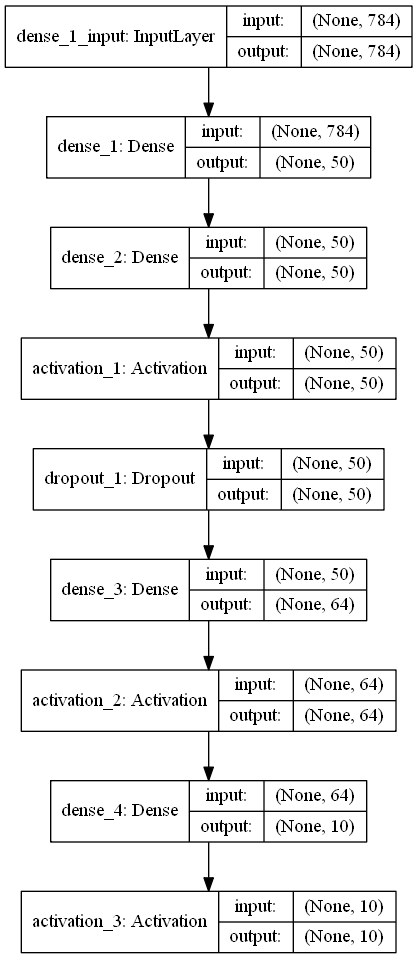

In [14]:
#Şimdi ise yaptığımız işlemleri görselleştirelim.

#from keras.utils.visualize_util import plot
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file="model.png", show_shapes= True)
Image("model.png")